# BICS_ABM
Ethan Roubenoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BICS_ABM import BICS_ABM, VaccineRule
import time
from joblib import Parallel, delayed
from scipy.stats.qmc import LatinHypercube
from scipy.stats import norm, uniform, randint

import collections
import re

/Users/eroubenoff/BICS_ABM/BICS_ABM.py:85: DtypeWarning: Columns (26,63,64,65,66,68,69,70,71,72,73,76,86,139,140,149,175,176,177,191,195,205,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  BICS = pd.read_csv("data/df_all_waves.csv")


## Quick, demonstrative example:

----------------------------------------
Parameters passed to simulation:
N_HH:            1000
GAMMA_MIN, _MAX: 48, 96
SIGMA_MIN, _MAX: 72, 168
BETA_VEC:            1  0.999926  0.999704  0.999333  0.998815  0.998149  0.997335  0.996374  0.995266  0.994011  0.99261  0.991063  0.98937  0.987532  0.98555  0.983424  0.981155  0.978743  0.976189  0.973494  0.970659  0.967684  0.964571  0.96132  0.957932  0.954409  0.950751  0.946959  0.943035  0.93898  0.934795  0.93048  0.926039  0.921471  0.916778  0.911961  0.907023  0.901964  0.896786  0.89149  0.886078  0.880552  0.874913  0.869163  0.863304  0.857337  0.851264  0.845087  0.838807  0.832428  0.825949  0.819375  0.812705  0.805943  0.79909  0.792149  0.785121  0.778009  0.770814  0.763539  0.756186  0.748757  0.741254  0.73368  0.726036  0.718326  0.71055  0.702713  0.694815  0.68686  0.678849  0.670785  0.662671  0.654508  0.6463  0.638048  0.629756  0.621425  0.613058  0.604657  0.596226  0.587766  0.57928  0.57077  0.56224  0.55369

Day   13 Hour 17 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:  1777 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   20 Hour 14 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:  1777 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   26 Hour 22 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:   277 | V2:  1500 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   33 Hour 16 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   40 Hour 13 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   47 Hour  9 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   54 Hour  7 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   59 Hour 23 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0
Index cases: 1740  770  206  2560  3261  


Day   63 Hour  8 | S:  3645 | E:    15 | Ic:     5 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   65 Hour 23 | S:  3619 | E:    36 | Ic:     9 | Isc:     1 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   68 Hour 13 | S:  3468 | E:   159 | Ic:    20 | Isc:    13 | R:     5 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   70 Hour 19 | S:  2933 | E:   588 | Ic:    73 | Isc:    59 | R:    12 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   72 Hour 17 | S:  2334 | E:   962 | Ic:   168 | Isc:   170 | R:    31 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  365 Hour 23 | S:  1944 | E:     2 | Ic:     0 | Isc:     0 | R:  1710 | D:     9 | V1:     0 | V2:     0 | VW:     0 | VBoost:  1777 | Edge counts: Household:     0 Work  Random      0
40.48745083808899


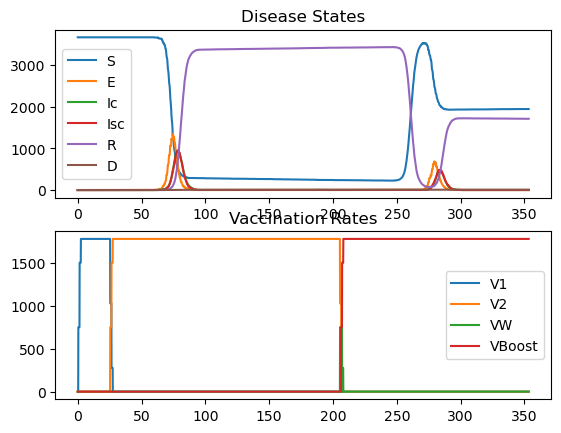

In [2]:
t0 = time.time()
result = BICS_ABM( 
        N_HH = 1000,
        SEED = 4949, 
        RHO = 0.5,
        ALPHA = 0.25,
        BETA0 =0.5,
        BETA1 = 1,
        T0 = 60,
        ISOLATION_MULTIPLIER = 1, #0.5, 
        N_VAX_DAILY = 1500,
        T_REINFECTION = 24*180,
        IMPORT_CASES_VEC = [1 if i%7 == 0 else 0 for i in range(365)],
        vax_rules = [VaccineRule(general=True, hesitancy=.5)],
        VEBoost = 1,
    
#         vax_rules = [
#             VaccineRule("age > 80"),
#             VaccineRule("age > 70"),
#             VaccineRule("age > 60"),
#             VaccineRule("age > 50", hesitancy = 0.5),
#             VaccineRule("age > 40", hesitancy = 0.5),
#             VaccineRule("age > 30", hesitancy = 0.5),
#             VaccineRule(general = True, hesitancy = 0.5),
#         ],
        silent = False,
        BOOSTER_DAY = 90,
        MAX_DAYS = 1*365)

print(time.time() - t0)
result.plot_trajectory()

In [ ]:
# Calculate the effective R0 as beta * average contacts per hour per person * average time infectious

0.01 * np.mean(result.n_edges)/result.S[0] * ((48+96)/2 + (72+168)/2)

In [ ]:
plt.plot(result.n_edges)

In [ ]:
plt.plot(result.n_edges)

# Main analysis

Run simulations that gradually decrease number of nonhousehold contacts required for priority access. Start at 30
and work down. Begin by assuming no asymptomatic transmission and 70% symptomatic rate, no isolation.


Run 10 simulations for each, and chart the number of deaths.

4 vaccine priorities: 
- No vax
- Equal priority vax
- Age priority
- Contact priority

4 transmission scenarios: 
- With all of the above
- With all of the above + prior immunity
- No isolation, no pre/asymptomatic transmission, no NPIs, no prior immunity

# Q1: Comparing strategies

In [ ]:
q1_df = pd.read_csv("q1_df.csv", index_col = 0)

In [ ]:
q1_d = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_d").iterrows()]
q1_d = [item for sublist in q1_d for item in sublist]

print(collections.Counter(q1_d))

q1_r = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_r").iterrows()]
q1_r = [item for sublist in q1_r for item in sublist]

print(collections.Counter(q1_r))

# Q2: What it index cases come after vaccines have been distributed?

In [ ]:
q2_df = pd.read_csv("q2_df.csv", index_col=0)
# For each sim, figure out which strategy had lowest death and infection rates

q2_d = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_d").iterrows()]
q2_d = [item for sublist in q2_d for item in sublist]

print(collections.Counter(q2_d))

q2_r = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_r").iterrows()]
q2_r = [item for sublist in q2_r for item in sublist]

print(collections.Counter(q2_r))


# Q3: Finding the top % of num_cc to vaccinate

In [ ]:
q3_df = pd.read_csv("q3_df.csv", index_col = 0)
col = q3_df.pop("general_d")
q3_df.insert(q3_df.shape[1], "0_d", col)
col = q3_df.pop("general_r")
q3_df.insert(q3_df.shape[1], "0_r", col)
q3_df

In [ ]:
q3_d = q3_df.filter(like="_d")
q3_r = q3_df.filter(like="r")
x = [re.split("_",x) for x in q3_d.columns]
x = [int(y[0]) for y in x]
print(x)

In [ ]:
fix, ax = plt.subplots(2, figsize= (10,10))

ax[0].plot(x, q3_d.quantile(.5)*100, color = "red", label="Median")
ax[0].plot(x, q3_d.quantile(.25)*100, color = "black", label = "50% of simulations")
ax[0].plot(x, q3_d.quantile(.75)*100, color = "black")
ax[0].plot(x, q3_d.quantile(.05)*100, color = "grey", label = "90% of simulations")
ax[0].plot(x, q3_d.quantile(.95)*100, color = "grey")
ax[0].set_title("Deaths (% of Population)")
ax[0].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")
ax[0].legend(loc='center left', bbox_to_anchor=(1, -.1))

ax[1].plot(x, q3_r.quantile(.5) *100, color = "red")
ax[1].plot(x, q3_r.quantile(.25)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.75)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.05)*100, color = "grey")
ax[1].plot(x, q3_r.quantile(.95)*100, color = "grey")
ax[1].set_title("Infections (% of Population)")
ax[1].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")

plt.savefig("figs/cc_threshhold.png",bbox_inches='tight')

# Sensitivity tests

beta: 0.0001 to 0.1

rho (probability of clinical): 0 to 1

alpha (relative infectiousness of pre and asymptomatic): 0 to 1

isolation multiplier: 0 to 1

In [ ]:
# beta vec with no asymptomatic transmission
beta_vec = np.arange(0.001, 0.1 , 0.001)
beta_vec = beta_vec.repeat(10)

t = time.time()


def multi_fn(beta):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        ALPHA = 0,
        RHO = 1,
        N_HH = 1000, BETA = beta, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(v) for v in beta_vec)
    
    
t = time.time() - t

print(len(beta_vec), "iterations took", t, "seconds")



In [ ]:


fig, ax = plt.subplots(2)
ax[0].scatter(beta_vec, [x[0] for x in result_vec])
ax[1].scatter(beta_vec, [x[1] for x in result_vec])

# Jointly vary the isolation multiplier and the proportion of symptomatic cases

In [ ]:
isomult_vec = np.arange(0, 1, 0.1)
rho_vec = np.arange(0, 1, 0.1)
isomult_vec, rho_vec = np.meshgrid(isomult_vec, rho_vec)
isomult_vec = isomult_vec.flatten().repeat(10)
rho_vec = rho_vec.flatten().repeat(10)


t = time.time()


def multi_fn(i, r):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        RHO = r,
        ISOLATION_MULTIPLIER = i, 
        N_HH = 1000, BETA = 0.01, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(*x) for x in zip(isomult_vec, rho_vec))
    
    
t = time.time() - t

print(len(result_vec), "iterations took", t, "seconds")



In [ ]:
dv = np.array([x[0] for x in result_vec]).reshape((10,10,10))
iv = np.array([x[1] for x in result_vec]).reshape((10,10,10))

In [ ]:
plt.imshow(iv, extent = [0,1,0,1])
plt.title("% Of population infected")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

In [ ]:
plt.imshow(dv, extent = [0,1,0,1])
plt.title("% Of population dead")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

# Speed test

Not whole necessary, but kind of fun. Seems like there is no benefit past 4 or 8 threads.


In [ ]:
if True:
    reps = np.arange(1, 128, 1)



    def multi_fn(i):
        """ Wrapper function for multiprocessing

        """

        result = BICS_ABM(
            N_HH = 1000, 
            silent = True, 
        )

        return 0


    tlist = list()
    jlist = [4, 8, 16, 32, 64, 128]
    for jobs in jlist:
        t = time.time()
        Parallel(n_jobs=jobs, verbose = 10, prefer="threads")(delayed(multi_fn)(v) for v in reps)
        t = time.time() - t
        tlist.append(t)

    plt.scatter(jlist, tlist)